# A Practice on "MovieLens 100K Dataset": #1 EDA (Explorative Data Analysis)

MovieLens 100K Dataset


## Get the data

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


force_remount = True: 강제적으로 mount를 재개할 때 사용

In [ ]:
cd /gdrive/MyDrive/Lectures/2023/RecSys

/gdrive/MyDrive/Lectures/2022/IntelligentMarketing


cd: 폴더 이동

In [ ]:
!mkdir -p raw
!curl -O http://files.grouplens.org/datasets/movielens/ml-100k.zip
!unzip -o ml-100k.zip -d raw/
!rm ml-100k.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4808k  100 4808k    0     0  15.2M      0 --:--:-- --:--:-- --:--:-- 15.2M
Archive:  ml-100k.zip
   creating: raw/ml-100k/
  inflating: raw/ml-100k/allbut.pl   
  inflating: raw/ml-100k/mku.sh      
  inflating: raw/ml-100k/README      
  inflating: raw/ml-100k/u.data      
  inflating: raw/ml-100k/u.genre     
  inflating: raw/ml-100k/u.info      
  inflating: raw/ml-100k/u.item      
  inflating: raw/ml-100k/u.occupation  
  inflating: raw/ml-100k/u.user      
  inflating: raw/ml-100k/u1.base     
  inflating: raw/ml-100k/u1.test     
  inflating: raw/ml-100k/u2.base     
  inflating: raw/ml-100k/u2.test     
  inflating: raw/ml-100k/u3.base     
  inflating: raw/ml-100k/u3.test     
  inflating: raw/ml-100k/u4.base     
  inflating: raw/ml-100k/u4.test     
  inflating: raw/ml-100k/u5.base     
  inflating: raw/ml-100k/u5.t

mkdir -p raw: 현 위치에 'raw' 디렉토리 생성 + 존재하지 않는 중간의 디렉토리 자동 생성 


curl -O 경로: 해당 경로의 파일을 파일명 변경 없이 다운로드 


unzip 파일명 -d 경로: unzip - 파일 압축해제, -d: 압축 해제되는 경로 지정


rm: 해당 파일 삭제

In [ ]:
# <!-- collapse=True -->
%matplotlib inline
from datetime import datetime
from IPython.display import Markdown
from os.path import join
from os.path import exists
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Use modified seaborn-darkgrid style with bigger text
# plt.style.use('big-darkgrid.mplstyle')
plt.style.use('seaborn-darkgrid')
# plt.style.available

Let's load and examine the ratings data. I sort the data by `timestamp` and break the `timestamp` column out into `year` and `month` and display the first 5 and last 5 ratings in the dataset.

In [ ]:
!head raw/ml-100k/u.occupation

administrator
artist
doctor
educator
engineer
entertainment
executive
healthcare
homemaker
lawyer


head 파일명: 1-10행까지의 내용을 출력 

#리눅스

In [ ]:
# <!-- collapse=True -->
ratings_df = pd.read_csv('raw/ml-100k/u.data', sep='\t', header=None, 
                         names=['userId', 'movieId', 'rating', 'timestamp'])
ratings_df['timestamp'] = ratings_df['timestamp'].apply(datetime.fromtimestamp)
ratings_df['year'] = ratings_df['timestamp'].dt.year
ratings_df['month'] = ratings_df['timestamp'].dt.month
ratings_df = ratings_df.sort_values('timestamp')
print('First 5:')
display(ratings_df.head())
print()
print('Last 5:')
display(ratings_df.tail())

First 5:


,userId,movieId,rating,timestamp,year,month
214,259,255,4,1997-09-20 03:05:10,1997,9
83965,259,286,4,1997-09-20 03:05:27,1997,9
43027,259,298,4,1997-09-20 03:05:54,1997,9
21396,259,185,4,1997-09-20 03:06:21,1997,9
82655,259,173,4,1997-09-20 03:07:23,1997,9



Last 5:


,userId,movieId,rating,timestamp,year,month
46773,729,689,4,1998-04-22 23:10:38,1998,4
73008,729,313,3,1998-04-22 23:10:38,1998,4
46574,729,328,3,1998-04-22 23:10:38,1998,4
64312,729,748,4,1998-04-22 23:10:38,1998,4
79208,729,272,4,1998-04-22 23:10:38,1998,4


#pandas

read_csv(경로, 구분자: 탭, 칼럼명이 없는 파일에 다음과 같이 'userId', 'movieId', 'rating', 'timestamp' 부여해 불러옴)

#파이썬

head(): dataframe 내 처음 5줄의 데이터 출력

tail(): dataframe 내 마지막 5줄의 데이터 출력

sort_values: 해당 value 기준으로 데이터 정렬

We can see from these rows that this part of the dataset is user-movie-rating triplets at different points in time. Let's ask some questions about the data to get a feel for what we're working with:

# 1. How are the ratings distributed?

I'd like to see what ratings are common and uncommon, so let's just plot counts of each rating:

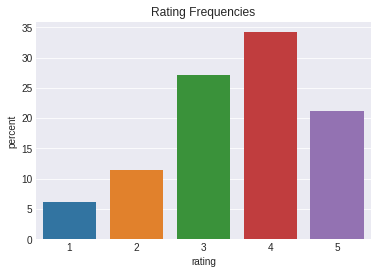

In [ ]:
# <!-- collapse=True -->
norm_counts = (
    ratings_df['rating']
    .##__TODO__
    .multiply(100)
    .reset_index()
    .rename(columns={'rating': 'percent', 'index': 'rating'})
)
ax = sns.barplot(x='rating', y='percent', data=norm_counts)
ax.set_title('Rating Frequencies')
plt.show()

3: 위에서 추출한 'ratings_df'의 열 'rating'을 추출.

5: * 100

6: 설정 인덱스 제거 -> 기본 인덱스(0,1,...,n)으로 변경

7: dataframe 인덱스명 변경 'rating'->'percent', 'index'->'rating'

#seaborn: matplotlib 기반 데이터 시각화 라이브러리

9: norm_counts를 기반으로 하고 x축: rating, y축: percent인 막대 그래프 생성

10: 그래프명: Rating Frequencies

11: 그래프 출력

# 2. How many ratings were submitted per month?

,year,month,# of Ratings
Date,,,
1997-09-01,1997,9,6704
1997-10-01,1997,10,10304
1997-11-01,1997,11,23980
1997-12-01,1997,12,11911
1998-01-01,1998,1,14095
1998-02-01,1998,2,10991
1998-03-01,1998,3,12656
1998-04-01,1998,4,9359


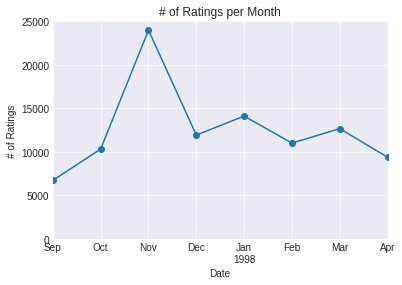

In [ ]:
# <!-- collapse=True -->
month_counts = ratings_df[['year', 'month', 'rating']].__TODO__.count()
month_counts = month_counts.rename(index=str, columns={'rating': '# of Ratings'})
month_counts = month_counts.reset_index()
month_counts['Date'] = month_counts[['year', 'month']].apply(
    lambda x: datetime(year=int(x[0]), month=int(x[1]), day=1), axis=1
)
month_counts = month_counts.set_index('Date', drop=True)
display(month_counts)
month_counts['# of Ratings'].plot(style='o-')
plt.ylabel('# of Ratings')
plt.title('# of Ratings per Month')
plt.ylim([0, 25000])
plt.gca().grid(which='minor')
plt.show()

3: index는 string 형태, 컬럼 'rating'->'# of Ratings'로 변경

5: Date 컬럼 추가. datetime의 year, month에 day는 1로 고정한 값.

#matplotlib.pyplib

10: month_counts의 '# of Ratings'를 점그래프화

11: 그래프의 y축 라벨: # of Ratings

12: 그래프 이름: # of Ratings per Month

13: y축 구간 0 ~ 25,000

14: 그리드 보조 그리드 선 표시..?

15: 그래프 호출

The number of ratings had a fairly large spike in November of 1997, but otherwise was relatively constant.

This leads to another question about changes over time:

# 5. How consistent are the average ratings over time?

,year,month,Rating,std
Date,,,,
1997-09-01,1997,9,3.540125,1.090641
1997-10-01,1997,10,3.591421,1.101290
1997-11-01,1997,11,3.559842,1.108959
1997-12-01,1997,12,3.580388,1.109337
1998-01-01,1998,1,3.397730,1.188682
1998-02-01,1998,2,3.455009,1.128968
1998-03-01,1998,3,3.548831,1.107848
1998-04-01,1998,4,3.574848,1.142793


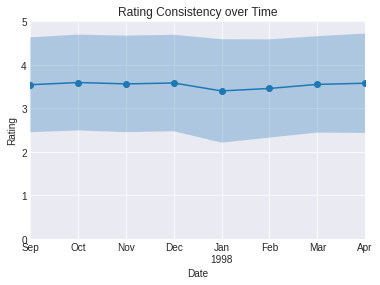

In [ ]:
# <!-- collapse=True -->
month_counts = ratings_df.groupby(['year', 'month'])['rating'].agg([np.mean, __TODO__])
month_counts = month_counts.rename(index=str, columns={'mean': 'Rating'})
month_counts = month_counts.reset_index()
month_counts['Date'] = month_counts[['year', 'month']].apply(
    lambda x: datetime(year=int(x[0]), month=int(x[1]), day=1), axis=1
)
month_counts = month_counts.set_index('Date', drop=True)
display(month_counts)
month_counts['Rating'].plot(style='o-')
plt.fill_between(month_counts.index,
                 month_counts['Rating'] - month_counts['std'],
                 month_counts['Rating'] + month_counts['std'],
                 alpha=0.3,
                )
plt.ylim([0, 5])
plt.ylabel('Rating')
plt.gca().grid(which='minor')
plt.title('Rating Consistency over Time')
plt.show()

#시간에 따라 변화하는 평점의 일관성을 시각화한 그래프

'ratings_df' 데이터 프레임을 'year', 'month'로 그룹화 -> 'rating' 열의 평균값 계산해 'month_counts'라는 새로운 열 추가.

'month_counts' 열 이름을 'Rating'으로 변경.

'month_counts'의 인덱스를 기본값으로 재설정.

'year', 'month'열 사용해 'Date'열 생성. datetime 활용.

'Date'열 인덱스로 활용.

'month_counts' 출력.

'Rating'열을 선그래프로 표현.

fill_between 함수 통해 일정 범위를 색칠. 오차 범위 표현.

y축 범위 0-5, y축 레이블 'Rating'.

그리드 추가. 그래프 이름 설정. 그래프 출력.

This average ratings were fairly consistent around 3.5. The lack of large changes over time will simplify modeling a little bit.

One last thing I'm curious about (for now) when it comes to changes over time:

# 6. How quickly do the movie and user bases grow over time?

I'll assume that a user has joined on her first rating, and that she remains a user from then on.

,userId,movieId,rating,timestamp,year,month,Date
214,259,255,4,1997-09-20 03:05:10,1997,9,1997-09-01
83965,259,286,4,1997-09-20 03:05:27,1997,9,1997-09-01
43027,259,298,4,1997-09-20 03:05:54,1997,9,1997-09-01
21396,259,185,4,1997-09-20 03:06:21,1997,9,1997-09-01
82655,259,173,4,1997-09-20 03:07:23,1997,9,1997-09-01


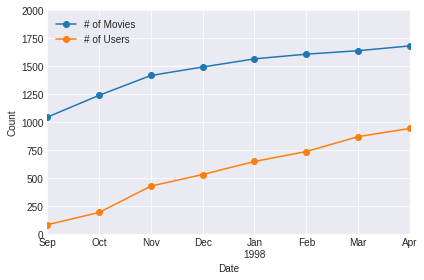

In [ ]:
# <!-- collapse=True -->
ratings_df['Date'] = ratings_df[['year', 'month']].apply(
    lambda x: datetime(year=int(x[0]), month=int(x[1]), day=1), axis=1
)
display(ratings_df.head())
n_users = []
n_movies = []
dates = np.unique(ratings_df['Date'])
for date in dates:
    ## TODO: how to count the number of unique users who rated until the date?
    n_users.append(ratings_df[ratings_df['Date'] <= date]['userId'].__TODO__)
    n_movies.append(ratings_df[ratings_df['Date'] <= date]['movieId'].__TODO__)
df_users = pd.DataFrame({'Date': dates, '# of Users': n_users}).set_index('Date')
df_movies = pd.DataFrame({'Date': dates, '# of Movies': n_movies}).set_index('Date')
fig, ax = plt.subplots()
df_movies['# of Movies'].plot(style='o-', ax=ax)
df_users['# of Users'].plot(style='o-', ax=ax)
plt.ylabel('Count')
plt.ylim([0, 2000])
ax.grid(which='minor')
plt.tight_layout()
plt.legend()
plt.show()

2-4: 'ratings_df' 데이터프레임에 'Date'열 추가. 'year', 'month'열 활용. 'datetime' 활용.

5: 'ratings_df' 데이터프레임 처음 5행 출력.

8: 'ratings_df'에서 중복되는 날짜 제거 후 추출해 'dates'에 저장.

11: 'dates' 순회하며 각 날짜(date)까지 평점을 기여한 고유한 사용자의 수를 계산해 'n_users' 리스트에 추가.

12: 'dates' 순회하며 각 날짜까지(date)까지 평점 받은 고유한 영화의 수 계산해 'n_movies' 리스트에 추가.

#pandas 라이브러리

13: 'dates', 'n_users'를 이용해 'df_users' 데이터 프레임 생성. 

14: 'dates', 'n_movives' 이용해 'df_movies' 데이터 프레임 생성.

15: 그래프 그리기 위한 서브플롯, 축 생성.

16-17: '# of Movies', '# of Users'을 선 그래프로 작성.

18-19: y축 라벨: Count, y축 범위: 0-2000로 설정.

20-: 그래프 상세 조정.

// 서브플롯: 여러 그래프를 하나의 화면 동시에 표시. plt.subplots(): 서브플롯 생성

// 그림 객체는 전체 그래프 영역, 축 객체는 개별 서브플롯 나타냄.

New users seen in the dataset look fairly linear over time, although the number of movies start out withover 1000 already in the system.

# 7. How sparse is the user/movies matrix we'll be dealing with?

Sparsity is a very common challenge to overcome in many collaborative filtering applications. By sparsity, I mean that if we create a matrix $R$ with dimensions $n_{users} \times n_{movies}$ where each element $r_{ij}$ is a single rating by user $i$ of movie $j$, this matrix will be very empty because most users have only rated a few of the 25,000+ movies available. Let's see how bad it is.

Here's one way to visualize the sparsity. The plot below shows a single, tiny black square for every user/movie combination we have. If everyone rated every movie, you'd see a solid black rectangle. Instead what we see is a lot of white--lots of user/movie combinations for which we don't have a rating (yet). You especially see a lot of white in the top right corner. This is probably because early raters had access to fewer movies to rate, and new users progressively had more movies to rate as they were added to the system.



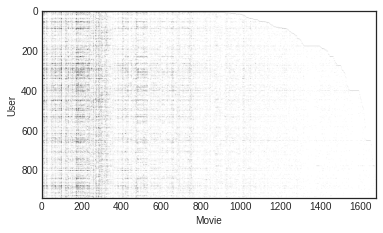

The matrix density is $n_{ratings}/(n_{users} \times n_{movies}) = 0.063$

In [ ]:
# <!-- collapse=True -->
from cf_utils import get_rating_matrix
rating_matrix, user_map, item_map = get_rating_matrix(ratings_df)
with plt.style.context('seaborn-white'):
    rating_matrix_binary = rating_matrix > 0
    plt.imshow(rating_matrix_binary)
    plt.xlabel('Movie')
    plt.ylabel('User')
    plt.show()

Markdown(
    r"The matrix density is $n_{{ratings}}/(n_{{users}} \times n_{{movies}}) = {:0.3f}$"
    .format(np.sum(rating_matrix_binary) / np.prod(rating_matrix.shape))
)

3: 'get_rating_matrix' 함수를 통해 'ratings_df'를 기반으로 평점 행렬, 사용자 매핑, 아이템 매핑을 구한다.

4: seaborn-white 스타일 그래프 작성

5: 'rating_matrix'를 인진 행렬로 변환해 'rating_matrix_binary'에 저장. 평점 있으면 True(흰색), 없으면 False(검은색).

6-9: 이진 행렬을 이미지로 표시. x,y축에 각각 'Movie', 'User' 레이블 추가. 그래프 출력.

In the plot above you also notice that there are a few darker rows and columns, but most rows and columns are pretty bare. Let's visualize the distributions of number of ratings by user and by movie. The way I chose to visualize this is with an [Empirical Cumulative Distribution Function (ECDF) plot](https://www.youtube.com/watch?v=ap4mfGvgDsM). An ECDF plot has an advantage compared to a histogram that all data points can be plotted in a meaningful way, and no bin size has to be chosen to average arbitrary chunks of it. This is especially helpful with the long-tailed distributions here.

In [ ]:
ratings_df['userId'].value_counts(ascending=True)

93      20
636     20
34      20
873     20
888     20
      ... 
276    518
450    540
13     636
655    685
405    737
Name: userId, Length: 943, dtype: int64

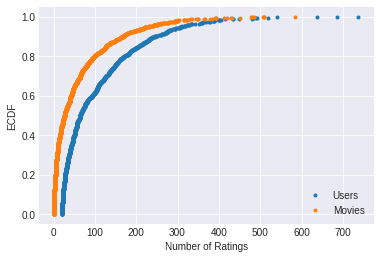

In [ ]:
# <!-- collapse=True -->
user_counts = ratings_df['userId'].value_counts(ascending=True)
user_counts.index = np.arange(len(user_counts)) / len(user_counts)
plt.plot(user_counts, user_counts.index, '.', label='Users')
movie_counts = ratings_df['movieId'].value_counts(ascending=True)
movie_counts.index = np.arange(len(movie_counts)) / len(movie_counts)
plt.plot(movie_counts, movie_counts.index, '.', label='Movies')
plt.xlabel('Number of Ratings')
plt.ylabel('ECDF')
plt.legend()
plt.show()

2: 'ratings_df'에서 각 사용자의 평점 수를 기준으로 userId를 정렬해 'user_counts'에 저장.

3: 'user_counts'의 인덱스를 전체 사용자 수로 나눠 정규화. 각 유저 평점 수로 상대적 위치 표시.

4: 'plt.plot()' 사용해 'user_counts'를 x축, 정규화된 인덱스 y축으로 점 그래프 작성. 

5-7: 2-3을 movie 버전으로.

8-10: x축, y축 라벨 설정. 범례 추가(plt.legend()). 그래프 출력.

In the plot above, you can learn, for example, that 40% of all users rated 50 or less movies, and 90% of movies have 169 or less ratings. In general, we seen that a large fraction of movies and users have few ratings associated with them, but a few movies and users have many more ratings.

The main thing to take from this though is that the matrix of possible ratings is quite sparse, and that we need to use models that deal with this lack of data.